In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = 'colab'
%matplotlib inline

# Loading the dataset

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data.csv")
dfc=df.copy()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


# changing the titles

In [5]:
df.columns = df.columns.str.title()
df.rename(columns={'Bmi': 'BMI', 'Sex': 'Gender'}, inplace=True)
df.columns

Index(['Id', 'Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Ever_Married',
       'Work_Type', 'Residence_Type', 'Avg_Glucose_Level', 'BMI',
       'Smoking_Status', 'Stroke'],
      dtype='object')

In [6]:
dfc.columns = dfc.columns.str.title()
dfc.rename(columns={'Bmi': 'BMI', 'Sex': 'Gender'}, inplace=True)
dfc.columns

Index(['Id', 'Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Ever_Married',
       'Work_Type', 'Residence_Type', 'Avg_Glucose_Level', 'BMI',
       'Smoking_Status', 'Stroke'],
      dtype='object')

In [7]:
df.drop(df[df['Gender'] == 'Other'].index)
dfc.drop(dfc[dfc['Gender'] == 'Other'].index)
dfc.drop(dfc[dfc['Gender'] == 'Other'].index, inplace=True)


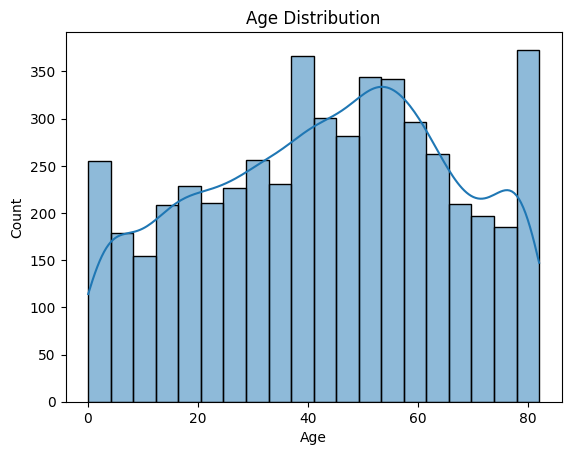

In [8]:
sns.histplot(dfc['Age'],kde=True)
plt.title('Age Distribution')
plt.show()

In [9]:
# Define age categories and their corresponding ranges
def categorize_age(age):
    if age >= 0 and age <= 1:
        return 'New Born'
    elif age >1 and age <= 3:
        return 'Toddler'
    elif age >3 and age <= 6:
        return 'Preschooler'
    elif age > 6 and age <= 12:
        return 'School Age'
    elif age > 12 and age < 20:
        return 'Teenager'
    elif age >= 20 and age <= 24:
        return 'Adolescense'
    elif age > 24 and age <= 39:
        return 'Adult'
    elif age > 39 and age <= 59:
        return 'Middle Aged'
    else:
        return 'Senior'
# Apply the function to the 'Age' column and create a new 'AgeCategory' column
dfc['AgeCategory'] = dfc['Age'].apply(categorize_age)

# Display the updated DataFrame with the new 'AgeCategory' column
dfc.head()


,Id,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke,AgeCategory
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Senior
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Middle Aged
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


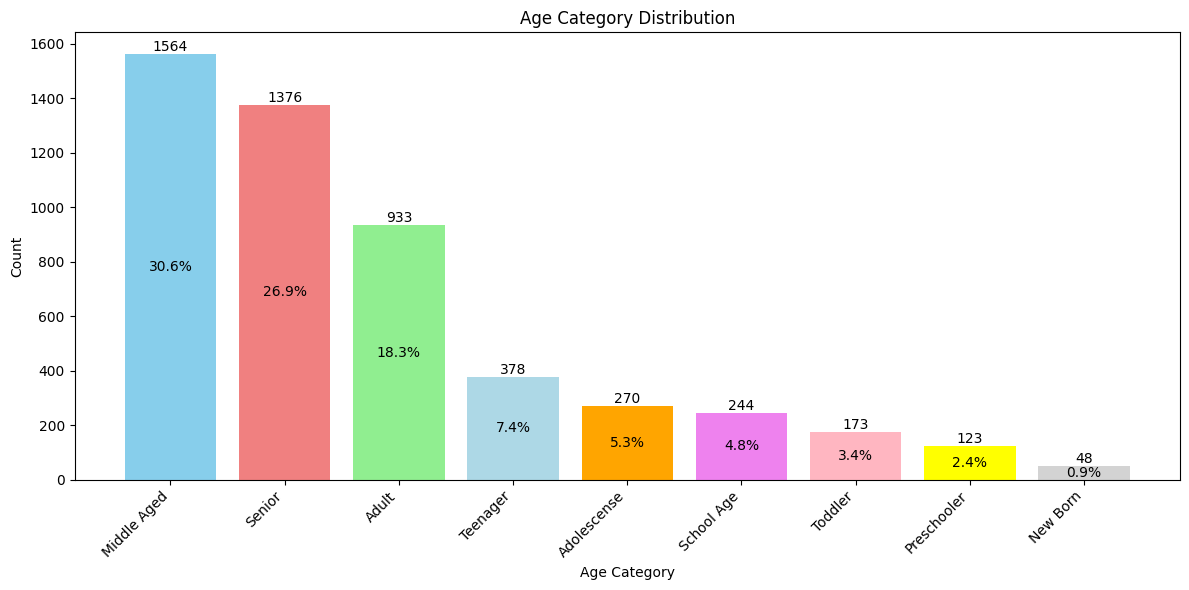

In [10]:
# Calculate value counts and percentages for each age category
age_category_counts = dfc['AgeCategory'].value_counts()
age_category_percentages = (age_category_counts / len(dfc)) * 100

# Create a bar plot with customizations
plt.figure(figsize=(12, 6))
bars = plt.bar(age_category_counts.index, age_category_counts.values, color=['skyblue', 'lightcoral', 'lightgreen', 'lightblue', 'orange', 'violet', 'lightpink','yellow','lightgray'])

# Add percentage labels inside each bar
for bar, percentage in zip(bars, age_category_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{percentage:.1f}%', ha='center', va='center', color='black', fontsize=10)

# Add value counts on top of each bar
for bar, count in zip(bars, age_category_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Age Category Distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [11]:
def categorize_BMI(bmi):
    if bmi  < 18.5:
        return 'Underweight'
    elif 18.5<= bmi <= 24.9:
        return 'Normal Weight'
    elif 24.9< bmi <= 29.9:
        return 'Overweight'
    elif 29.9< bmi <= 34.9:
        return 'Moderately Obese'
    elif 34.9< bmi <= 40:
        return 'Severely Obese'
    else:
        return 'Extreme Obese'
dfc['BMI_Group'] = dfc['BMI'].apply(categorize_BMI)

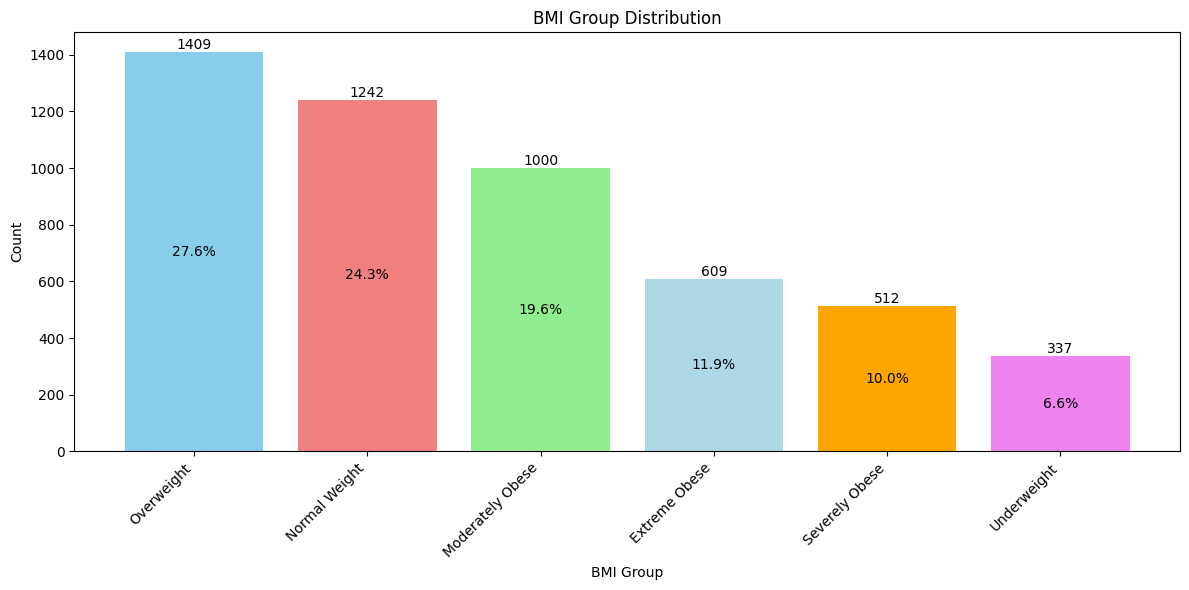

In [12]:
# Calculate value counts and percentages for each BMI group
bmi_group_counts = dfc['BMI_Group'].value_counts()
bmi_group_percentages = (bmi_group_counts / len(dfc)) * 100

# Create a bar plot with customizations
plt.figure(figsize=(12, 6))
bars = plt.bar(bmi_group_counts.index, bmi_group_counts.values, color=['skyblue', 'lightcoral', 'lightgreen', 'lightblue', 'orange', 'violet'])

# Add percentage labels inside each bar
for bar, percentage in zip(bars, bmi_group_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{percentage:.1f}%', ha='center', va='center', color='black', fontsize=10)

# Add value counts on top of each bar
for bar, count in zip(bars, bmi_group_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel('BMI Group')
plt.ylabel('Count')
plt.title('BMI Group Distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


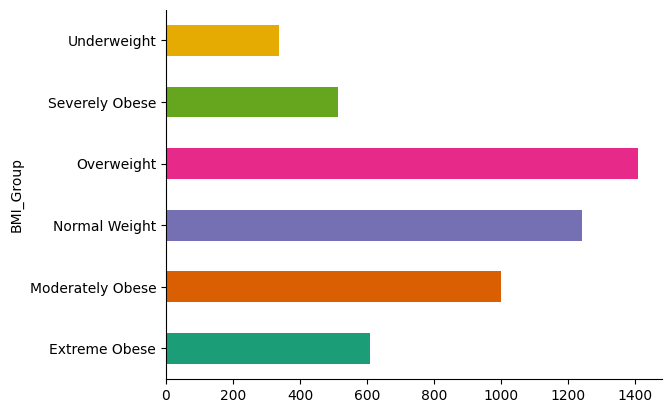

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
dfc.groupby('BMI_Group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
bmi_counts = (dfc['BMI'] > 45).value_counts()
print(bmi_counts)

BMI
False    4954
True      155
Name: count, dtype: int64


In [15]:
Q1 = dfc['BMI'].quantile(0.25)
Q3 = dfc['BMI'].quantile(0.75)
IQR = Q3 - Q1

x = Q1 - 3 * IQR
y = Q3 + 3 * IQR

outliers = dfc[(dfc['BMI'] < x) | (dfc['BMI'] > y)]
outliers

,Id,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke,AgeCategory,BMI_Group
358,66333,Male,52.0,0,0,Yes,Self-employed,Urban,78.40,64.8,never smoked,0,Middle Aged,Extreme Obese
544,545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0,Middle Aged,Extreme Obese
928,41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0,Adolescense,Extreme Obese
1559,37759,Female,53.0,0,0,Yes,Private,Rural,72.63,66.8,Unknown,0,Middle Aged,Extreme Obese
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0,Teenager,Extreme Obese
2764,20292,Female,24.0,0,0,Yes,Private,Urban,85.55,63.3,never smoked,0,Adolescense,Extreme Obese
4188,70670,Female,27.0,0,0,Yes,Private,Rural,57.96,64.4,never smoked,0,Adult,Extreme Obese
4209,51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0,Adult,Extreme Obese


In [16]:
bmi_avg_value = dfc.groupby(['AgeCategory', 'Gender'])['BMI'].median().reset_index()
bmi_avg_value

,AgeCategory,Gender,BMI
0,Adolescense,Female,26.50
1,Adolescense,Male,25.75
2,Adult,Female,28.10
3,Adult,Male,29.90
4,Middle Aged,Female,29.80
5,Middle Aged,Male,30.80
6,New Born,Female,17.35
7,New Born,Male,18.30
8,Preschooler,Female,17.95
9,Preschooler,Male,18.10


In [17]:
dfc['BMI'] = dfc['BMI'].fillna(dfc.groupby(['Gender', 'AgeCategory'])['BMI'].transform('median'))

In [18]:
dfc['BMI'].isnull().sum()

np.int64(0)

<ipython-input-19-08a3c8ad3e80>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-19-08a3c8ad3e80>:14: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-19-08a3c8ad3e80>:15: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



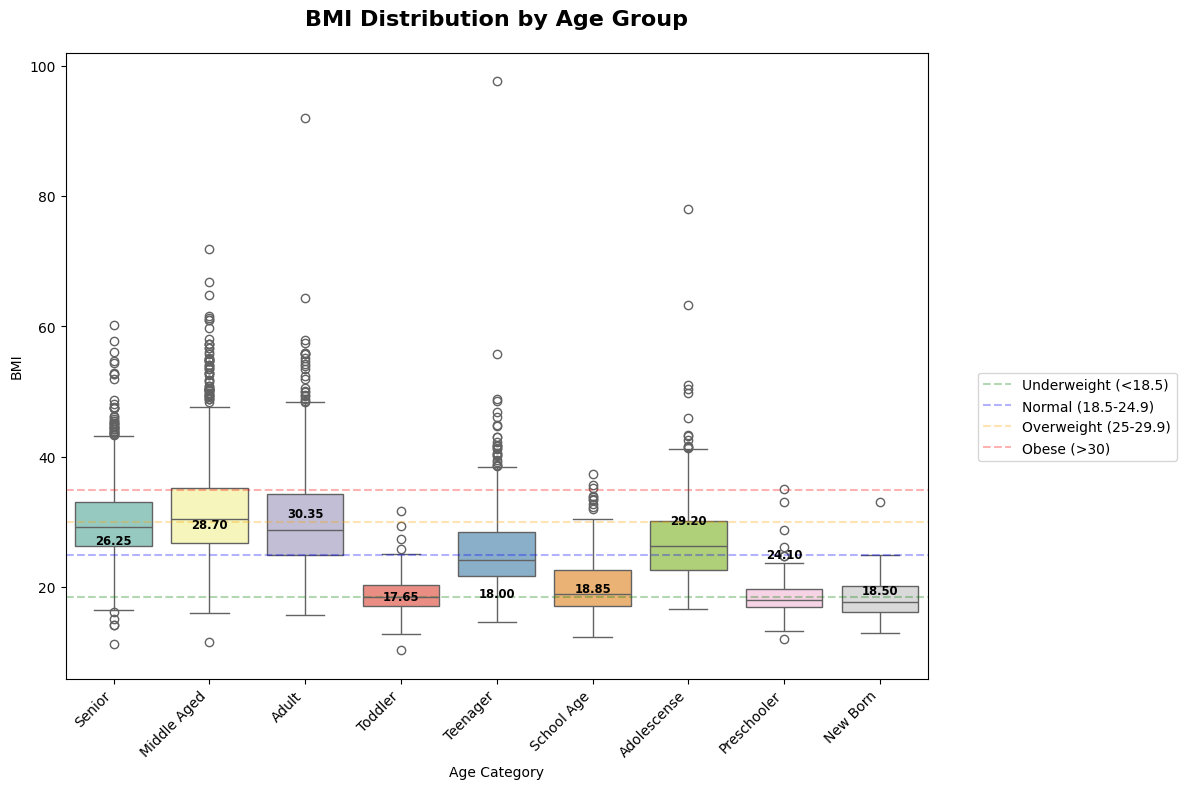

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='AgeCategory', y='BMI', data=dfc, palette="Set3",legend=False)
plt.title('BMI Distribution by Age Group',pad=20, fontsize=16,fontweight='bold')
plt.xlabel('Age Category')
plt.ylabel('BMI')

plt.xticks(rotation=45, ha='right')
# Calculate and display the median for each group
medians = dfc.groupby(['AgeCategory'])['BMI'].median()

vertical_offset = dfc['BMI'].std() * 0.05  # Adjust the vertical offset as needed

for xtick in range(len(medians)):
    plt.text(xtick, medians[xtick] + vertical_offset,
             f'{medians[xtick]:.2f}',
             horizontalalignment='center', size='small', color='black', weight='semibold')

plt.axhline(y=18.5, color='green', linestyle='--', alpha=0.3, label='Underweight (<18.5)')
plt.axhline(y=24.9, color='blue', linestyle='--', alpha=0.3, label='Normal (18.5-24.9)')
plt.axhline(y=29.9, color='orange', linestyle='--', alpha=0.3, label='Overweight (25-29.9)')
plt.axhline(y=34.9, color='red', linestyle='--', alpha=0.3, label='Obese (>30)')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='upper left')

plt.tight_layout()
plt.show()

In [20]:
bins = [0, 70, 140, 200, dfc['Avg_Glucose_Level'].max()]
labels = ['Low', 'Normal', 'High', 'Very High']
dfc['Glucose_Level_Group'] = pd.cut(dfc['Avg_Glucose_Level'], bins=bins, labels=labels)
group_counts = dfc['Glucose_Level_Group'].value_counts()

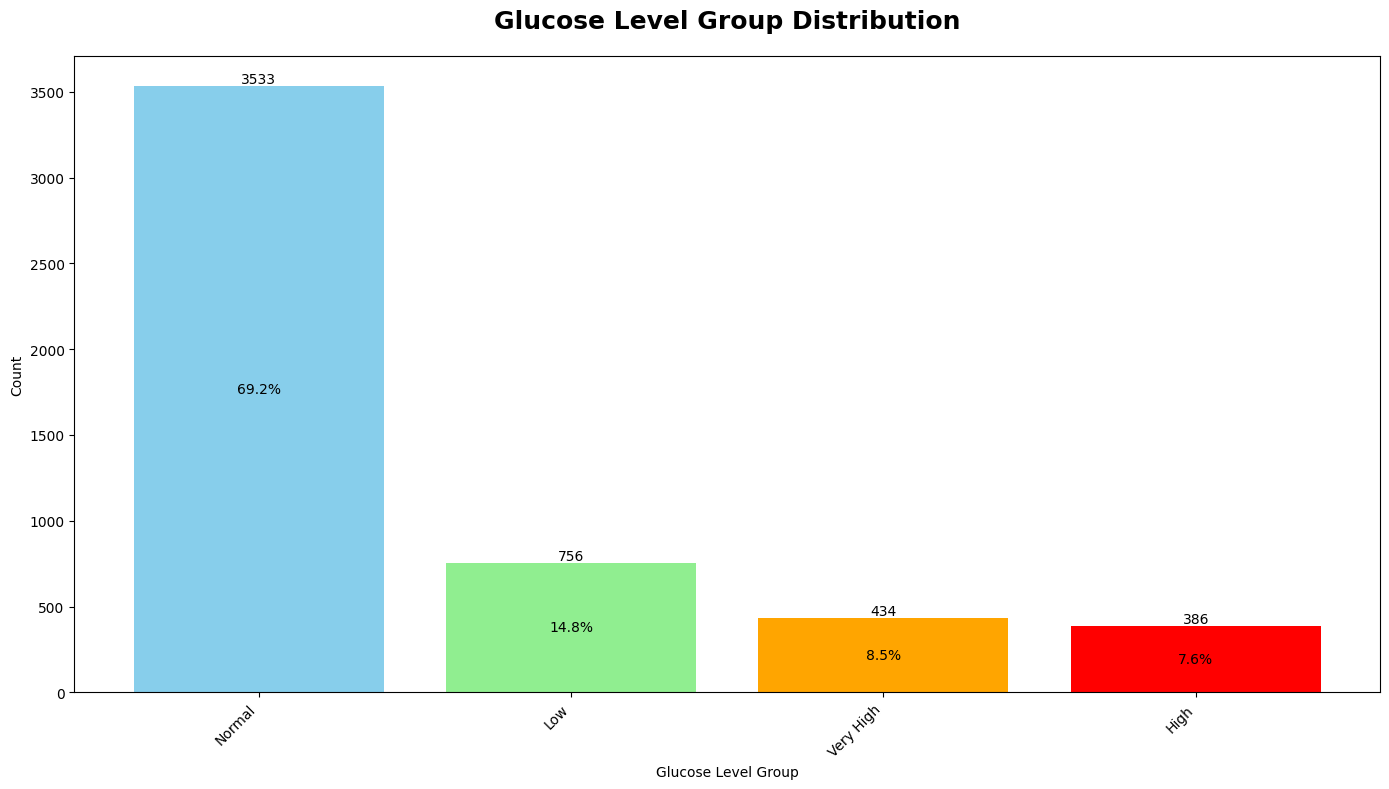

In [21]:
# Calculate value counts and percentages for each glucose level group
glucose_group_counts = dfc['Glucose_Level_Group'].value_counts()
glucose_group_percentages = (glucose_group_counts / len(dfc)) * 100

# Create a bar plot with customizations
plt.figure(figsize=(14, 8))
bars = plt.bar(glucose_group_counts.index, glucose_group_counts.values, color=['skyblue', 'lightgreen', 'orange', 'red'])

# Add percentage labels inside each bar
for bar, percentage in zip(bars, glucose_group_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{percentage:.1f}%', ha='center', va='center', color='black', fontsize=10)

# Add value counts on top of each bar
for bar, count in zip(bars, glucose_group_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel('Glucose Level Group')
plt.ylabel('Count')
plt.title('Glucose Level Group Distribution', pad=20, fontsize=18, fontweight='bold', color='Black')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


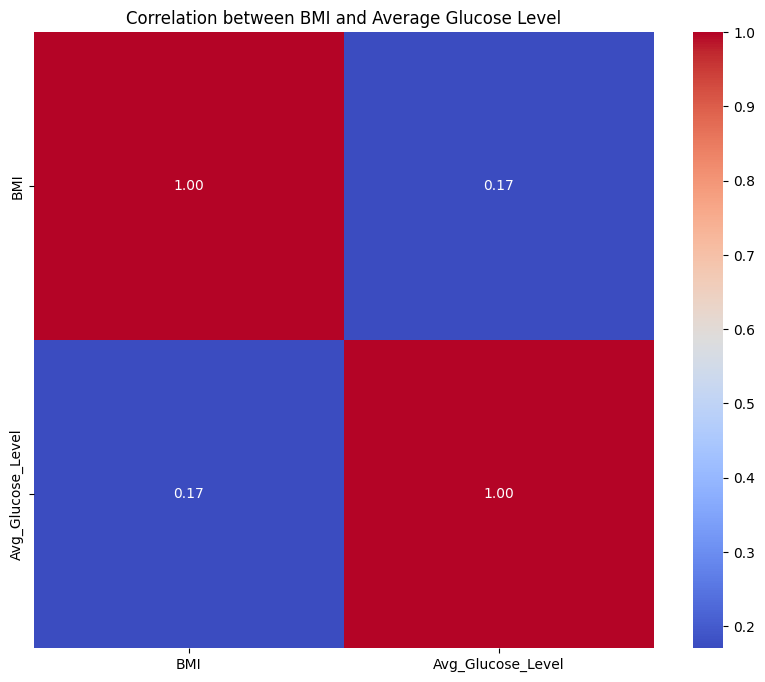

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(dfc[['BMI', 'Avg_Glucose_Level']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between BMI and Average Glucose Level')
plt.show()

In [23]:
correlation_positive = dfc[dfc['Stroke'] == 1][['BMI', 'Avg_Glucose_Level']].corr()
correlation_negative = dfc[dfc['Stroke'] == 0][['BMI', 'Avg_Glucose_Level']].corr()

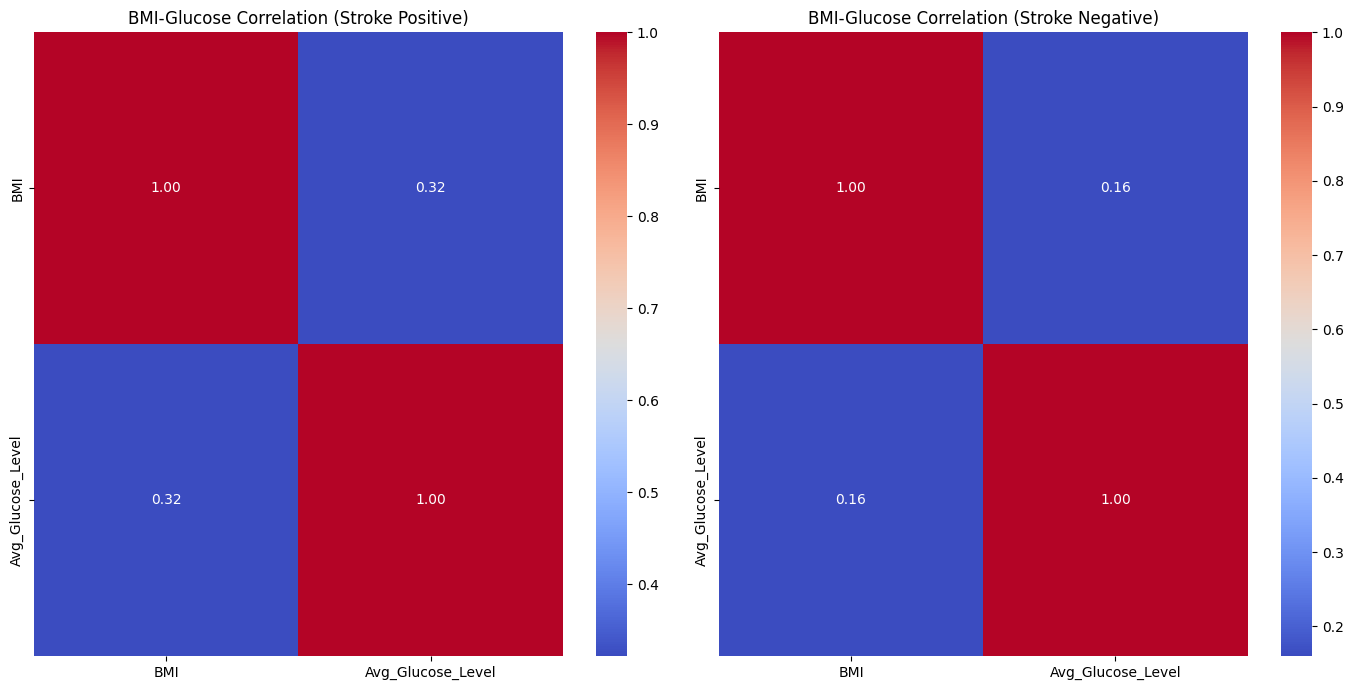

In [24]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.heatmap(correlation_positive, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('BMI-Glucose Correlation (Stroke Positive)')

plt.subplot(1, 2, 2)
sns.heatmap(correlation_negative, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('BMI-Glucose Correlation (Stroke Negative)')

plt.tight_layout()
plt.show()


In [25]:
htcorrelation_positive = dfc[dfc['Hypertension'] == 1][['BMI', 'Avg_Glucose_Level']].corr()
htcorrelation_negative = dfc[dfc['Hypertension'] == 0][['BMI', 'Avg_Glucose_Level']].corr()

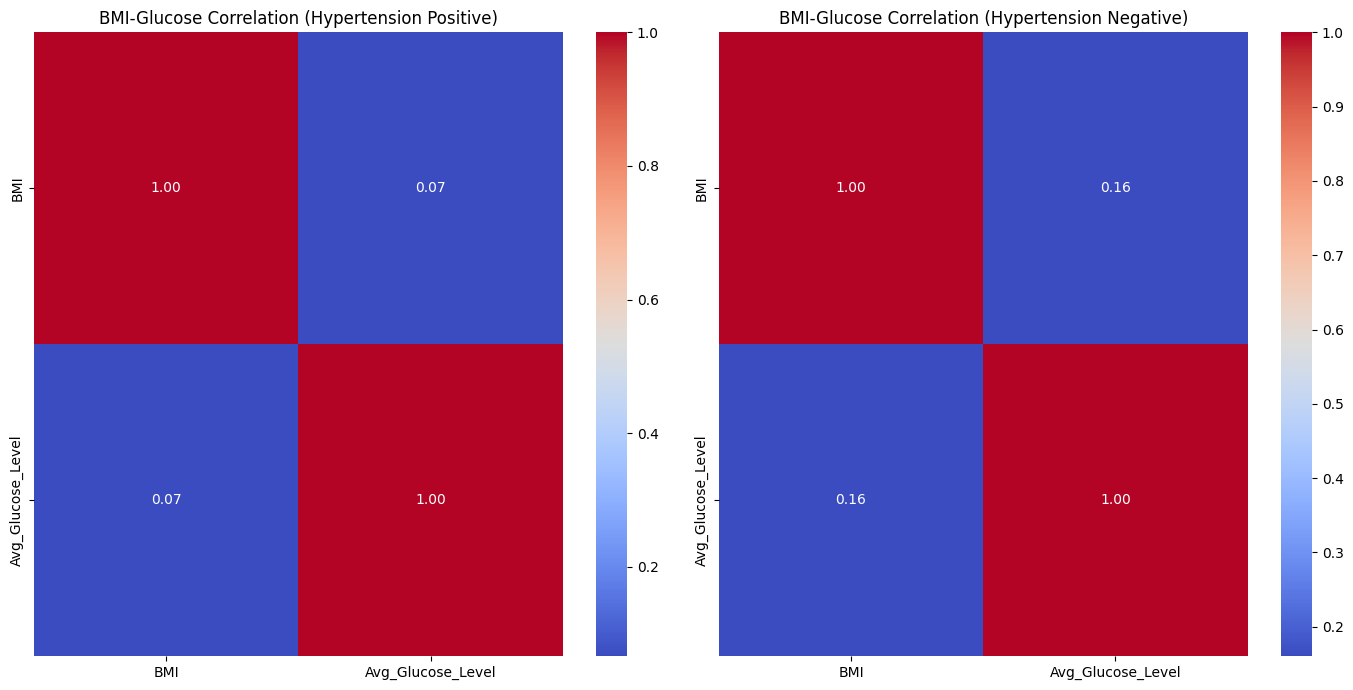

In [26]:
htcorrelation_positive = dfc[dfc['Hypertension'] == 1][['BMI', 'Avg_Glucose_Level']].corr()
htcorrelation_negative = dfc[dfc['Hypertension'] == 0][['BMI', 'Avg_Glucose_Level']].corr()
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.heatmap(htcorrelation_positive, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('BMI-Glucose Correlation (Hypertension Positive)')

plt.subplot(1, 2, 2)
sns.heatmap(htcorrelation_negative, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('BMI-Glucose Correlation (Hypertension Negative)')

plt.tight_layout()
plt.show()

In [27]:
hdcorrelation_positive = dfc[dfc['Heart_Disease'] == 1][['BMI', 'Avg_Glucose_Level']].corr()
hdcorrelation_negative = dfc[dfc['Heart_Disease'] == 0][['BMI', 'Avg_Glucose_Level']].corr()

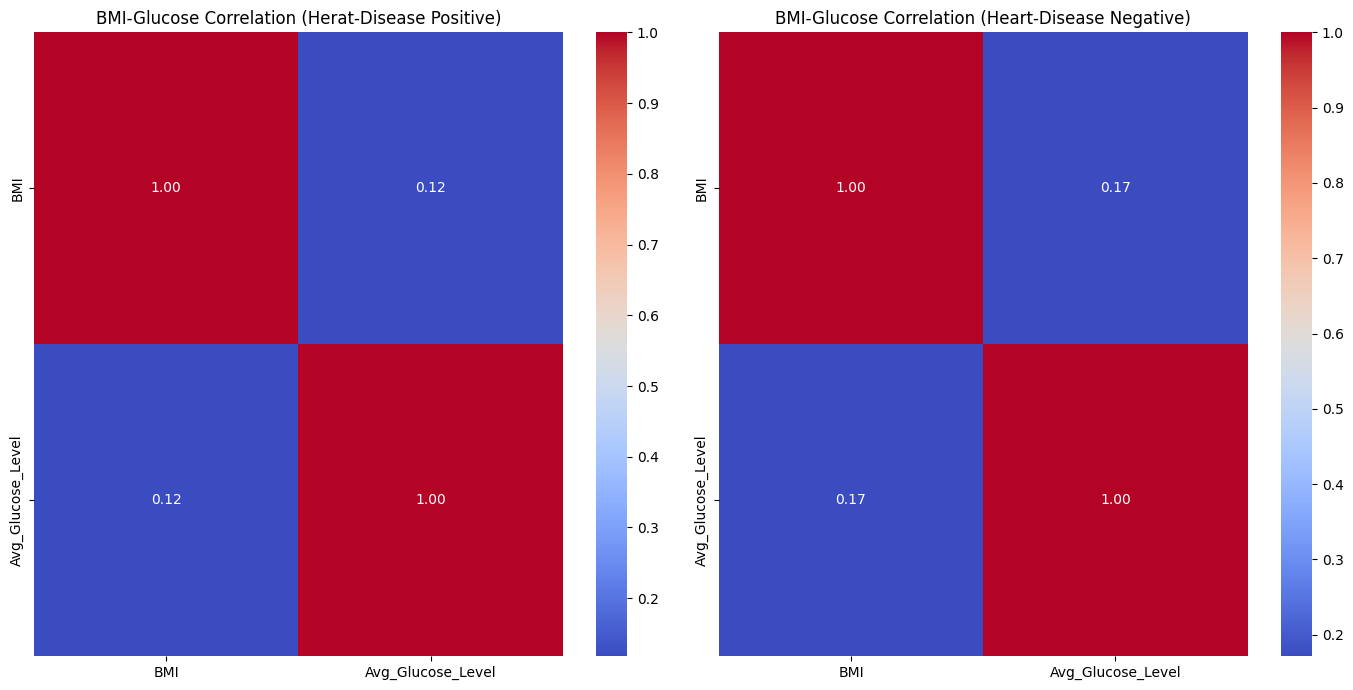

In [28]:
hdcorrelation_positive = dfc[dfc['Heart_Disease'] == 1][['BMI', 'Avg_Glucose_Level']].corr()
hdcorrelation_negative = dfc[dfc['Heart_Disease'] == 0][['BMI', 'Avg_Glucose_Level']].corr()
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.heatmap(hdcorrelation_positive, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('BMI-Glucose Correlation (Herat-Disease Positive)')

plt.subplot(1, 2, 2)
sns.heatmap(hdcorrelation_negative, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('BMI-Glucose Correlation (Heart-Disease Negative)')

plt.tight_layout()
plt.show()

In [29]:
dfc['Hypertension'].value_counts()

,count
Hypertension,
0,4611
1,498


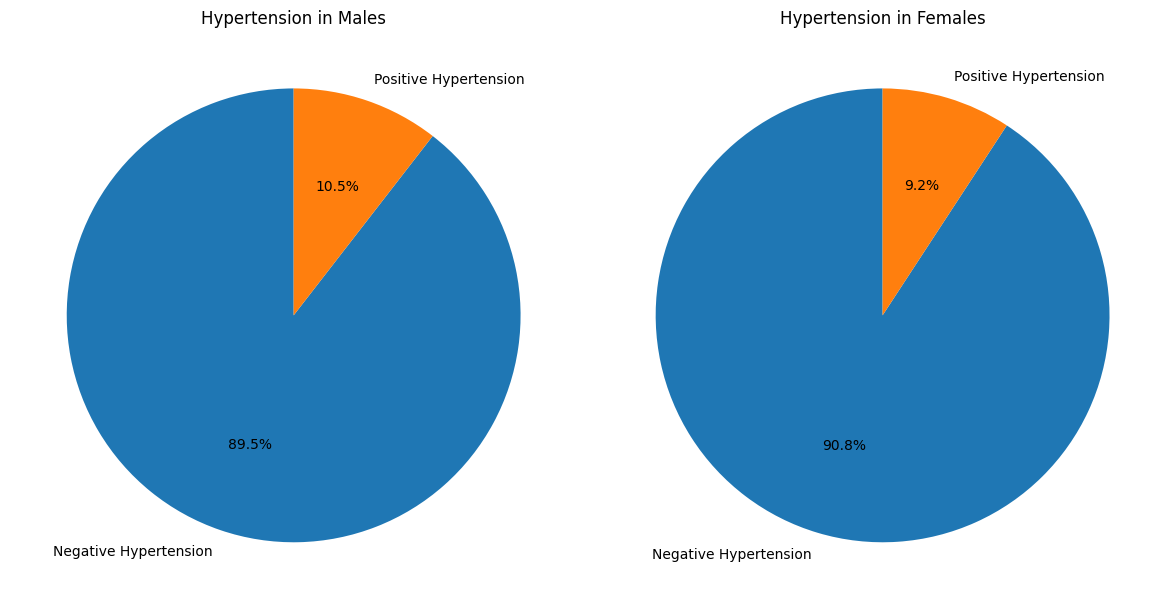

In [30]:
# Create the pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for males
male_data = dfc[dfc['Gender'] == 'Male']['Hypertension'].value_counts()
male_labels = ['Negative Hypertension', 'Positive Hypertension']
axes[0].pie(male_data, labels=male_labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Hypertension in Males')

# Pie chart for females
female_data = dfc[dfc['Gender'] == 'Female']['Hypertension'].value_counts()
female_labels = ['Negative Hypertension', 'Positive Hypertension']
axes[1].pie(female_data, labels=female_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Hypertension in Females')

plt.tight_layout()
plt.show()

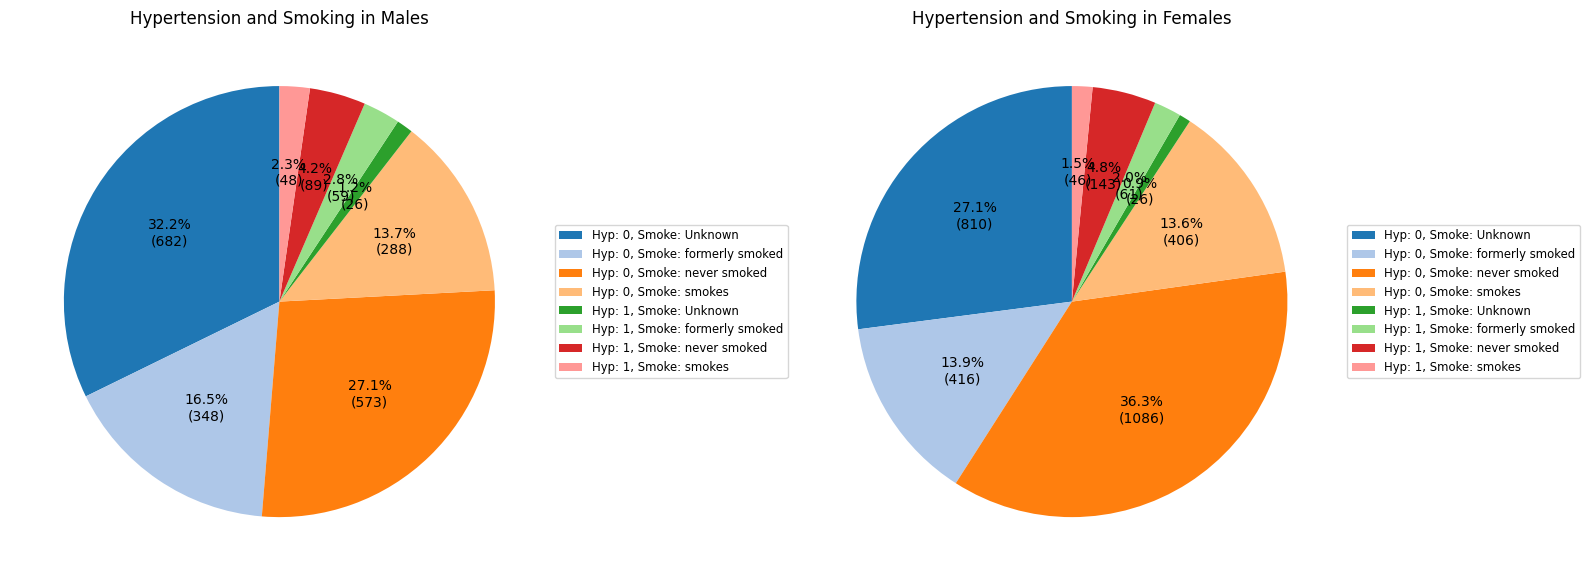

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Grouping and preparing data
male_data = dfc[dfc['Gender'] == 'Male'].groupby(['Hypertension', 'Smoking_Status']).size()
female_data = dfc[dfc['Gender'] == 'Female'].groupby(['Hypertension', 'Smoking_Status']).size()

# Labels for the legend (shortened for clarity)
male_labels = [f"Hyp: {h}, Smoke: {s}" for (h, s) in male_data.index]
female_labels = [f"Hyp: {h}, Smoke: {s}" for (h, s) in female_data.index]

# Colors for the slices
colors = plt.cm.tab20.colors

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for Males
axes[0].pie(
    male_data,
    labels=None,
    autopct=lambda p: f'{p:.1f}%\n({int(p * sum(male_data) / 100)})',
    startangle=90,
    colors=colors
)
axes[0].set_title('Hypertension and Smoking in Males')
axes[0].legend(male_labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# Pie chart for Females
axes[1].pie(
    female_data,
    labels=None,
    autopct=lambda p: f'{p:.1f}%\n({int(p * sum(female_data) / 100)})',
    startangle=90,
    colors=colors
)
axes[1].set_title('Hypertension and Smoking in Females')
axes[1].legend(female_labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# Layout adjustment
plt.tight_layout()
plt.show()


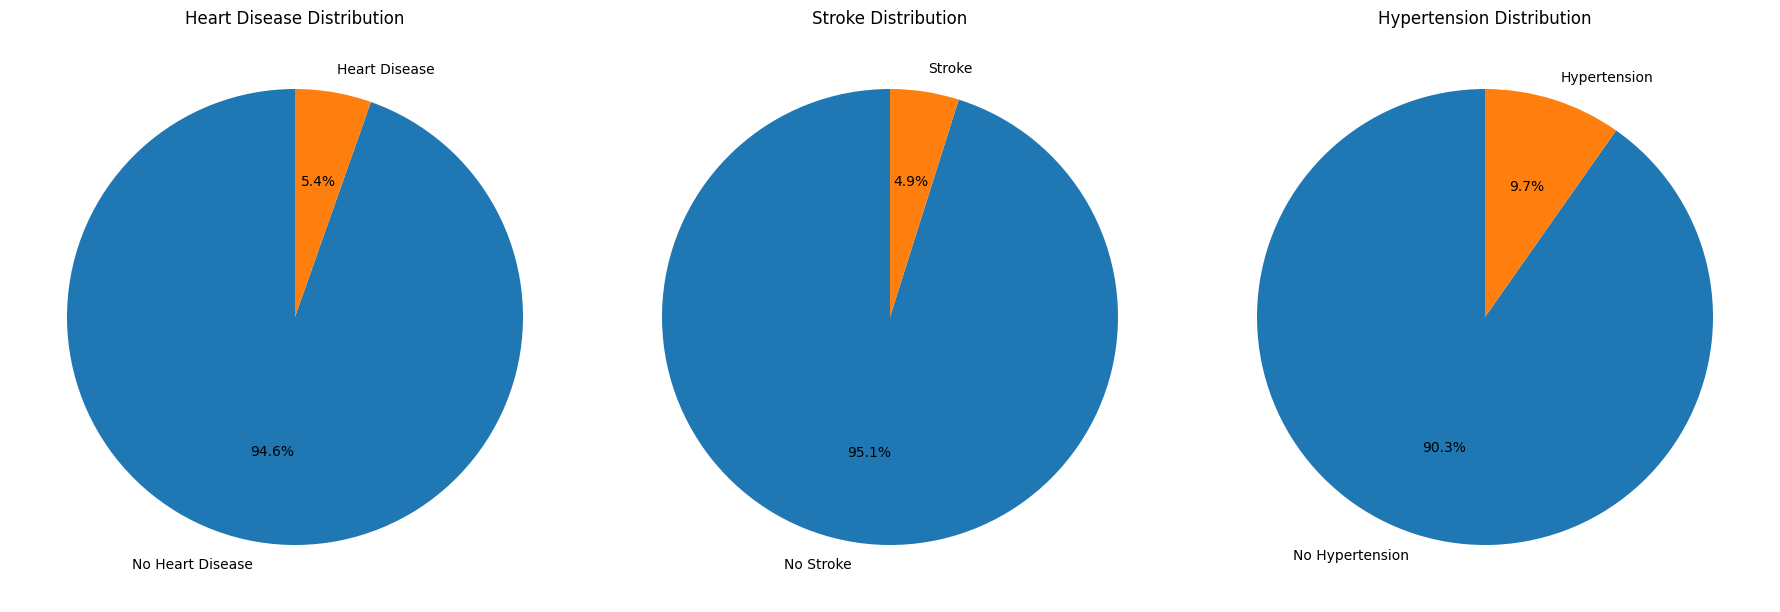

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart for Heart Disease
heart_disease_data = dfc['Heart_Disease'].value_counts()
heart_disease_labels = ['No Heart Disease', 'Heart Disease']
axes[0].pie(heart_disease_data, labels=heart_disease_labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Heart Disease Distribution')

# Pie chart for Stroke
stroke_data = dfc['Stroke'].value_counts()
stroke_labels = ['No Stroke', 'Stroke']
axes[1].pie(stroke_data, labels=stroke_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Stroke Distribution')

# Pie chart for Hypertension (from your existing code)
hypertension_data = dfc['Hypertension'].value_counts()
hypertension_labels = ['No Hypertension', 'Hypertension']
axes[2].pie(hypertension_data, labels=hypertension_labels, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Hypertension Distribution')


plt.tight_layout()
plt.show()

In [33]:
dfc_grouped1 = dfc.groupby(['Hypertension', 'Stroke']).size().unstack(fill_value=0)
dfc_grouped_percent1 = dfc_grouped1.div(dfc_grouped1.sum(axis=1), axis=0) * 100

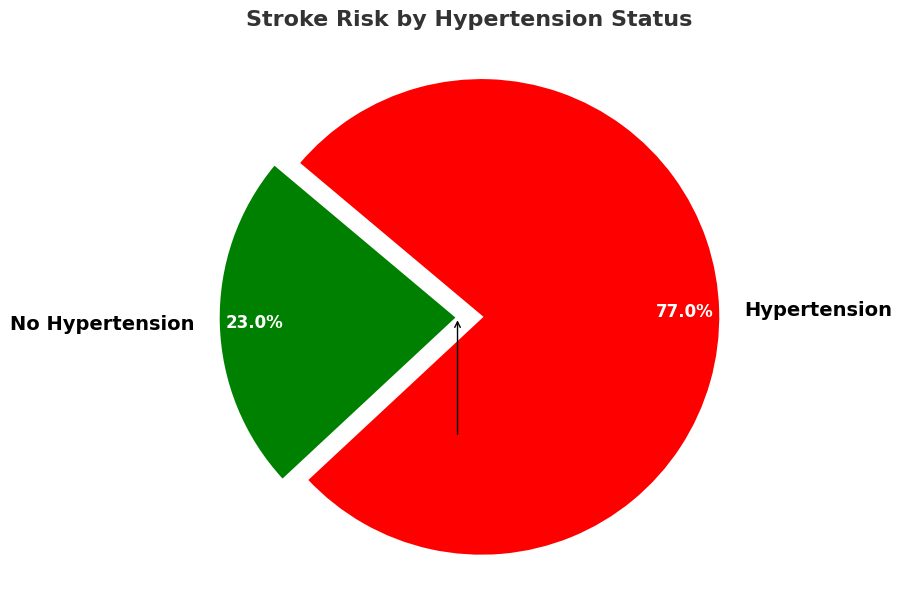

In [34]:
labels = ['No Hypertension', 'Hypertension']
sizes = dfc_grouped_percent1[1]
colors = ['green', 'red']
explode = [0, 0.1]

fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2, 'linestyle': 'solid'}
)
plt.setp(autotexts, size=12, weight="bold", color='white')
plt.setp(texts, size=14, weight="bold", color='black')
ax.set_title('Stroke Risk by Hypertension Status', fontsize=16, weight='bold', color='#333333', pad=20)

ax.annotate('', xy=(0, 0), xytext=(0, -0.5),
            arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->', lw=1))

ax.axis('equal')

plt.tight_layout()
plt.show()

In [35]:
dfc_grouped = dfc.groupby(['Heart_Disease', 'Stroke']).size().unstack(fill_value=0)
dfc_grouped_percent = dfc_grouped.div(dfc_grouped.sum(axis=1), axis=0) * 100

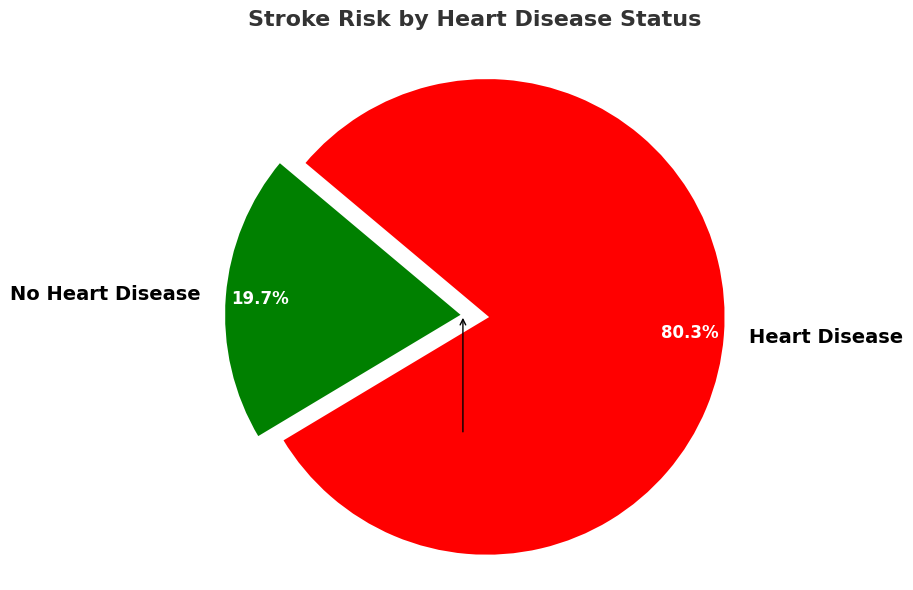

In [36]:
labels = ['No Heart Disease', 'Heart Disease']
sizes = dfc_grouped_percent[1]
colors = ['green', 'red']
explode = [0, 0.1]

fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2, 'linestyle': 'solid'}
)
plt.setp(autotexts, size=12, weight="bold", color='white')
plt.setp(texts, size=14, weight="bold", color='black')
ax.set_title('Stroke Risk by Heart Disease Status', fontsize=16, weight='bold', color='#333333', pad=20)

ax.annotate('', xy=(0, 0), xytext=(0, -0.5),
            arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->', lw=1))

ax.axis('equal')

plt.tight_layout()
plt.show()

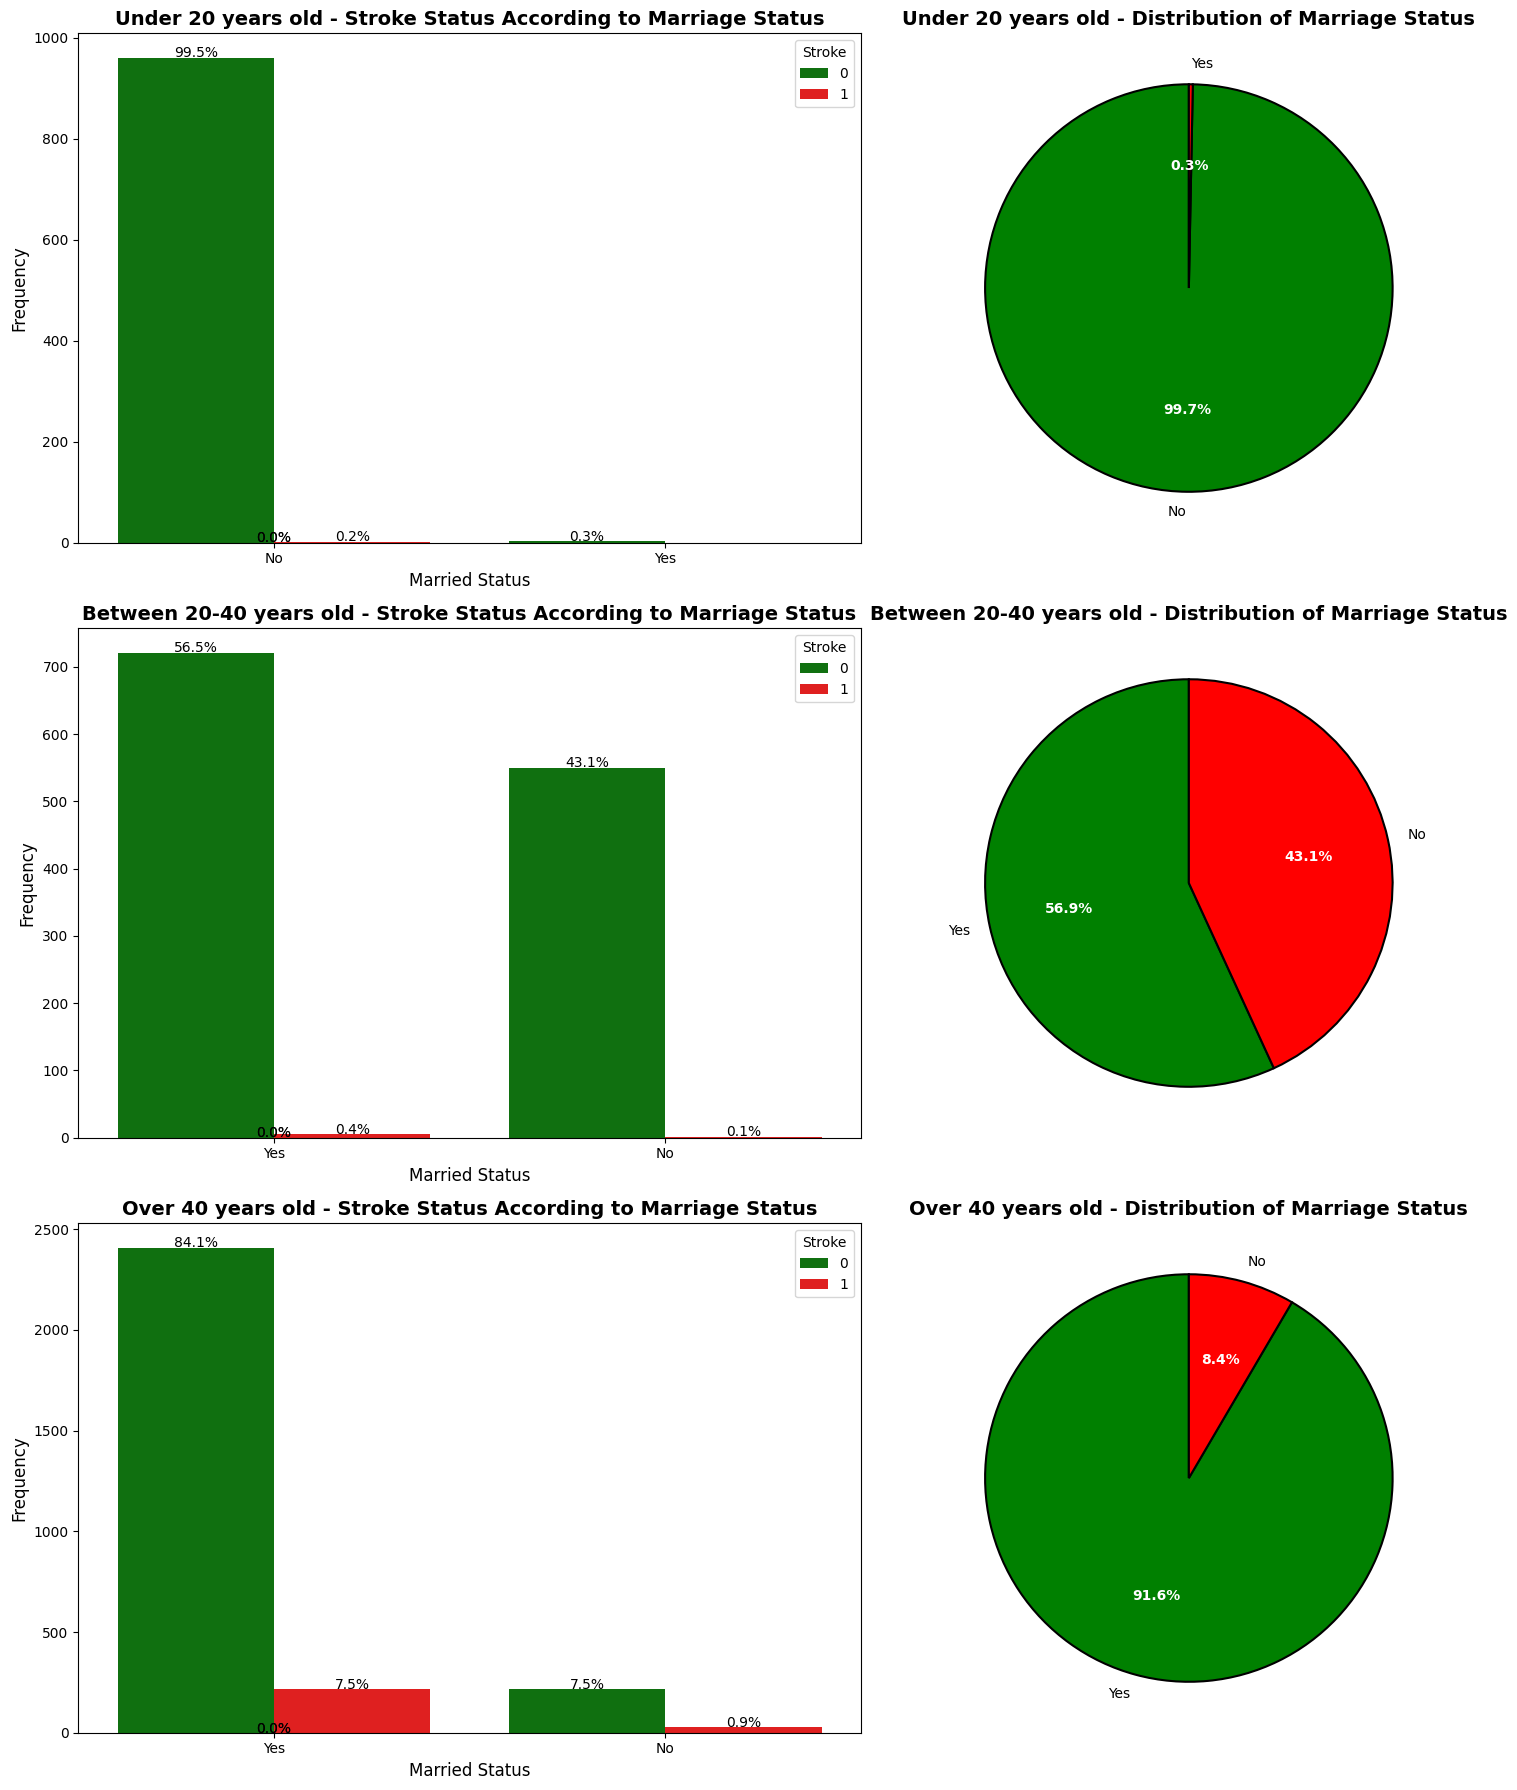

In [37]:
under_20 = dfc[dfc['Age'] < 20]
between_20_40 = dfc[(dfc['Age'] >= 20) & (dfc['Age'] <= 40)]
over_40 = dfc[dfc['Age'] > 40]

age_groups = {
    "Under 20 years old": under_20,
    "Between 20-40 years old": between_20_40,
    "Over 40 years old": over_40
}

fig, axes = plt.subplots(3, 2, figsize=(16, 18))

custom_palette = ["green", "red"]

for idx, (group_name, group_data) in enumerate(age_groups.items()):
    ever_married_value = group_data['Ever_Married'].value_counts()
    countplot = sns.countplot(data=group_data,
                              x='Ever_Married',
                              palette=custom_palette,
                              ax=axes[idx][0],
                              hue='Stroke')
    axes[idx][0].set_title(f'{group_name} - Stroke Status According to Marriage Status', fontsize=14, fontweight='bold')
    axes[idx][0].set_xlabel('Married Status', fontsize=12)
    axes[idx][0].set_ylabel('Frequency', fontsize=12)

    total = len(group_data)
    for p in countplot.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        countplot.text(p.get_x() + p.get_width() / 2, height + 1, f'{percentage:.1f}%', ha="center", fontsize=10)

    wedges, texts, autotexts = axes[idx][1].pie(
        ever_married_value,
        labels=ever_married_value.index,
        colors=custom_palette,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
    )
    axes[idx][1].set_title(f'{group_name} - Distribution of Marriage Status', fontsize=14, fontweight='bold')

    for text in texts:
        text.set_color("black")
    for autotext in autotexts:
        autotext.set_color("white")
        autotext.set_fontweight("bold")

plt.tight_layout()
plt.show()

In [38]:
stress_analysis = round(dfc.groupby('Work_Type')[['Hypertension', 'Stroke']].mean() * 100,2)
stress_analysis = stress_analysis.rename(columns={'Hypertension': 'Hypertension Rate (%)', 'Stroke': 'Stroke Rate (%)'})

fig = px.imshow(stress_analysis.T,
                labels={'x': 'Work Type', 'y': 'Indicator'},
                x=stress_analysis.index,
                y=stress_analysis.columns,
                color_continuous_scale=['pink', 'red'],
                color_continuous_midpoint=50,
                title='High Blood Pressure , SMOKING and Stroke Rates by Job Type',
                text_auto=True,
                height=600, width=800)

fig.update_layout(
    title_font_size=24,
    title_font_family="Arial, sans-serif",
    title_font_color='black',
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    font=dict(family="Arial, sans-serif", size=12, color='black'),
    coloraxis_colorbar=dict(title='Rate (%)', tickvals=[0, 50, 100], ticktext=['0%', '50%', '100%'])
)

# Use py.iplot for rendering in the notebook
fig.show()

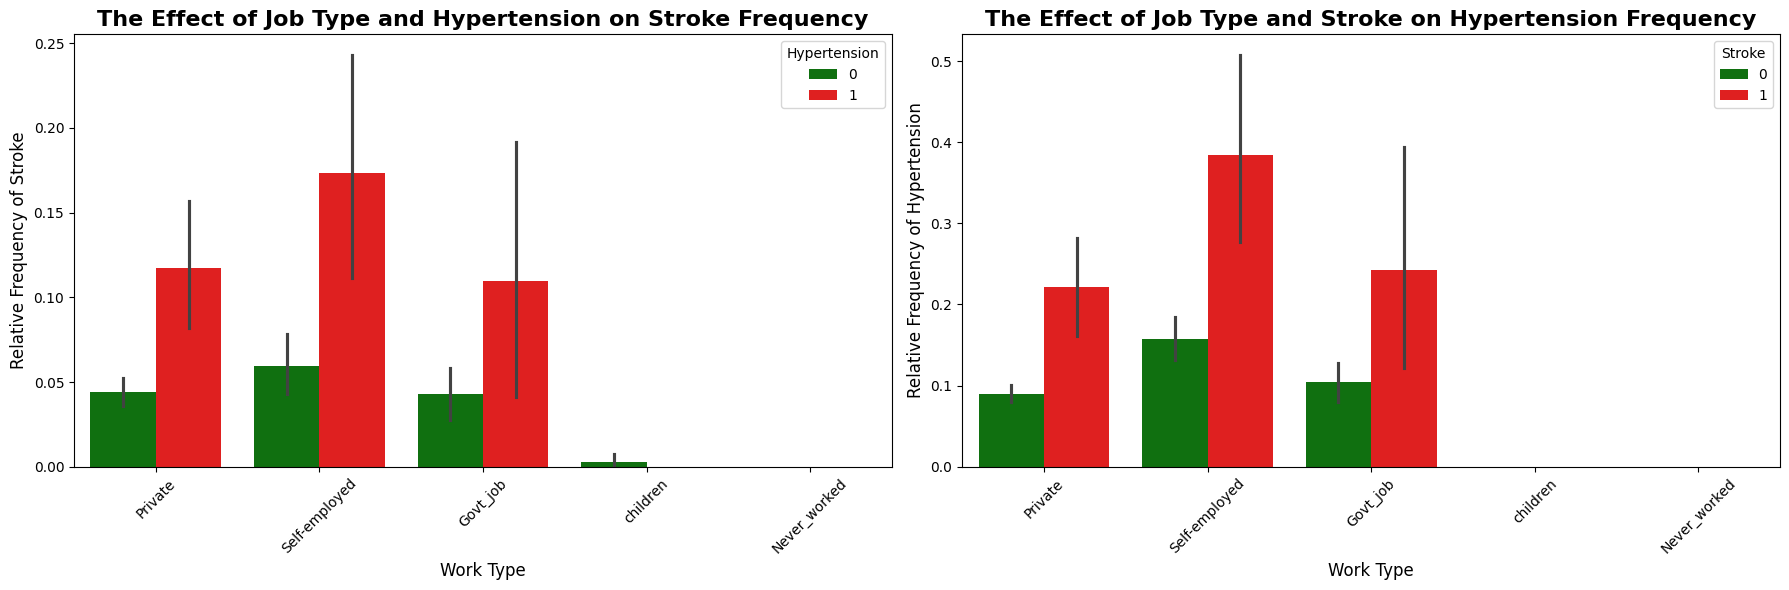

In [39]:
palette = {0: 'green', 1: 'red'}

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x='Work_Type', y='Stroke', hue='Hypertension', data=dfc, palette=palette, ax=axes[0])
axes[0].set_title('The Effect of Job Type and Hypertension on Stroke Frequency', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Work Type', fontsize=12)
axes[0].set_ylabel('Relative Frequency of Stroke', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(
    x='Work_Type',
    y='Hypertension',
    hue='Stroke',
    data=dfc,
    palette=palette,
    ax=axes[1]
)
axes[1].set_title('The Effect of Job Type and Stroke on Hypertension Frequency', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Work Type', fontsize=12)
axes[1].set_ylabel('Relative Frequency of Hypertension', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

In [40]:
grouped_work_stress_male = dfc[dfc['Gender'] == 'Male' ].groupby(['Work_Type'])['Stroke'].mean().reset_index()
grouped_lifestyle_stress_male = dfc[dfc['Gender'] == 'Male'].groupby(['Smoking_Status', 'Ever_Married', 'BMI'])['Stroke'].mean().reset_index()

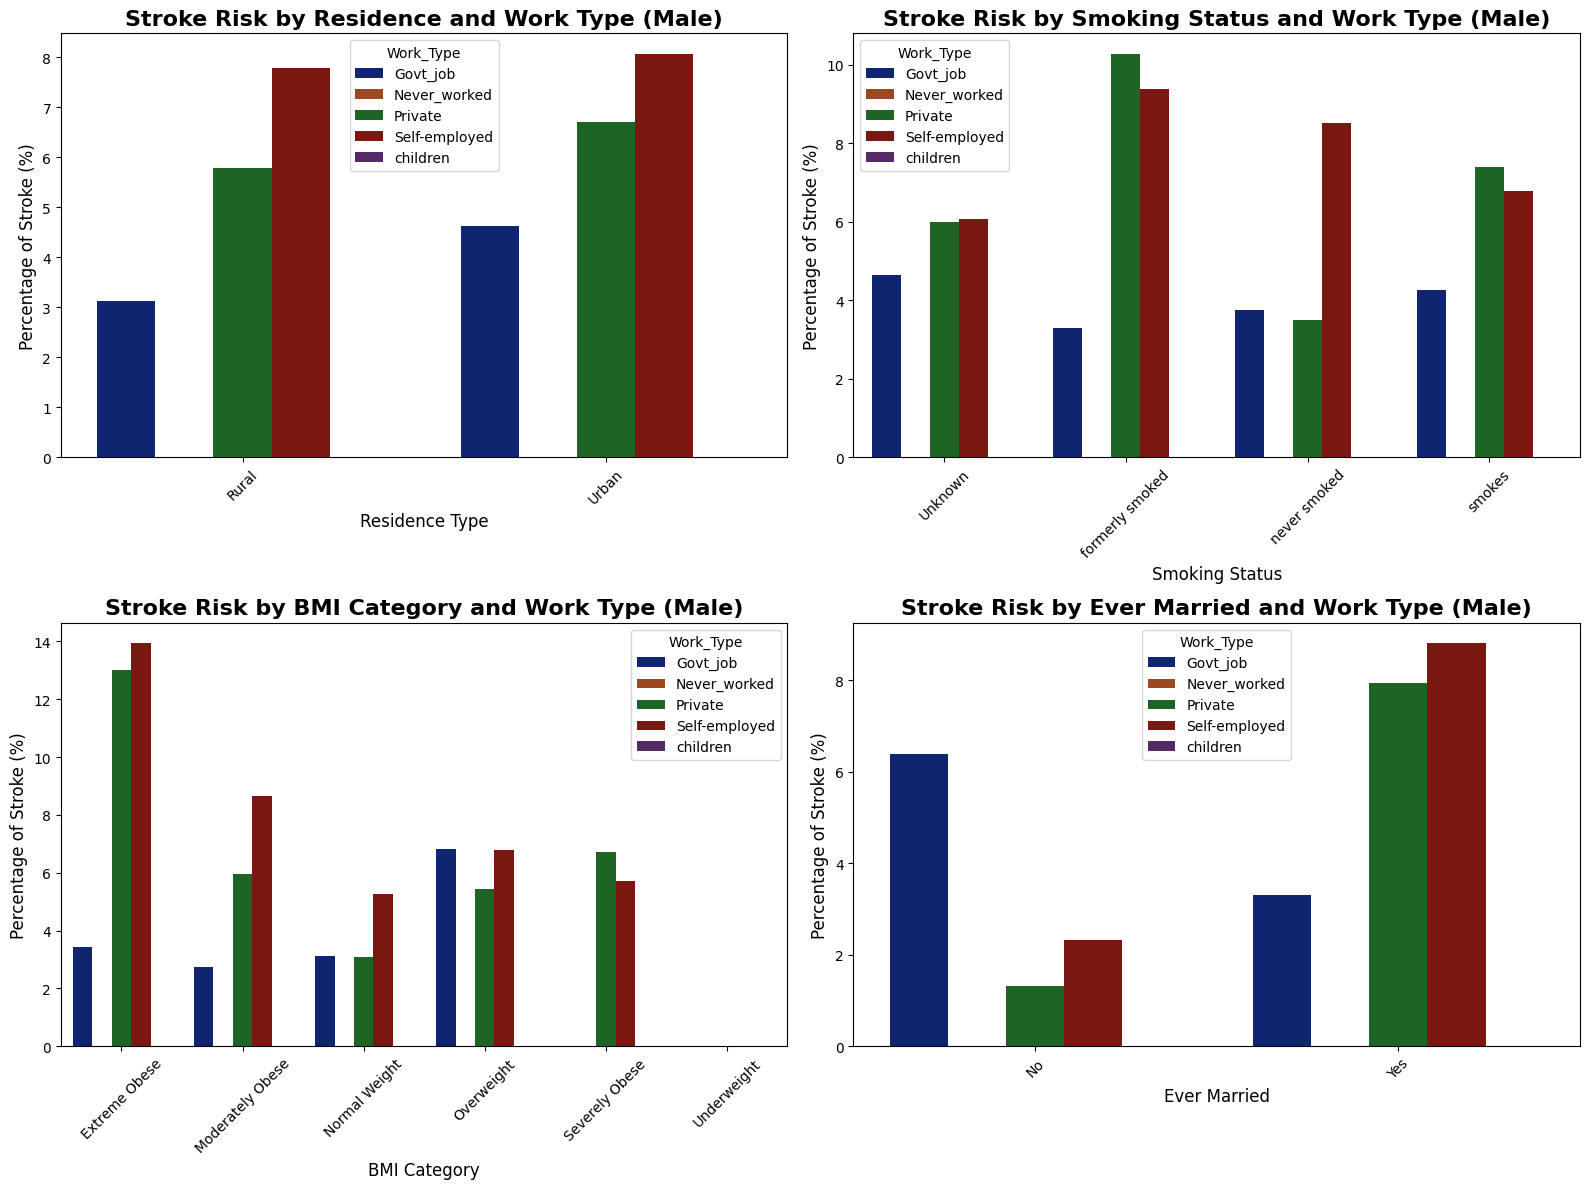

In [41]:
df_male = dfc[dfc['Gender'] == 'Male']

# Create separate grouped DataFrames for each plot
def create_grouped_data(data, group_cols):
    grouped = data.groupby(group_cols)['Stroke'].mean() * 100
    return grouped.reset_index()

# Create grouped data for each plot
residence_work = create_grouped_data(df_male, ['Residence_Type', 'Work_Type'])
smoking_work = create_grouped_data(df_male, ['Smoking_Status','Work_Type'])
bmi_work = create_grouped_data(df_male, ['BMI_Group', 'Work_Type'])
married_work = create_grouped_data(df_male, ['Ever_Married', 'Work_Type'])

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Residence Type and Work Type
sns.barplot(data=residence_work,
            x='Residence_Type',
            y='Stroke',
            hue='Work_Type',
            palette='dark',
            ax=axes[0,0])

axes[0, 0].set_title('Stroke Risk by Residence and Work Type (Male)', fontsize=16, fontweight='bold')
axes[0, 0].set_xlabel('Residence Type', fontsize=12)
axes[0, 0].set_ylabel('Percentage of Stroke (%)', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)


# Plot 2: Smoking Status and Work Type
sns.barplot(data=smoking_work,
            x='Smoking_Status',
            y='Stroke',
            hue= 'Work_Type',
            palette='dark',
            ax=axes[0, 1])

axes[0, 1].set_title('Stroke Risk by Smoking Status and Work Type (Male)', fontsize=16, fontweight='bold')
axes[0, 1].set_xlabel('Smoking Status', fontsize=12)
axes[0, 1].set_ylabel('Percentage of Stroke (%)', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: BMI Group and Work Type
sns.barplot(data=bmi_work,
            x='BMI_Group',
            y='Stroke',
            hue= 'Work_Type',
            palette='dark',
            ax=axes[1, 0])

axes[1, 0].set_title('Stroke Risk by BMI Category and Work Type (Male)', fontsize=16, fontweight='bold')
axes[1, 0].set_xlabel('BMI Category', fontsize=12)
axes[1, 0].set_ylabel('Percentage of Stroke (%)', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Marriage Status and Work Type
sns.barplot(data=married_work,
            x='Ever_Married',
            y='Stroke',
            hue='Work_Type',
            palette='dark',
            ax=axes[1, 1])

axes[1, 1].set_title('Stroke Risk by Ever Married and Work Type (Male)', fontsize=16, fontweight='bold')
axes[1, 1].set_xlabel('Ever Married', fontsize=12)
axes[1, 1].set_ylabel('Percentage of Stroke (%)', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [42]:
!pip install dash

In [43]:
import dash
from dash import dcc, html
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

# Assuming dfc is already loaded and preprocessed
# Add these preprocessing steps if not already present
bins = [0, 70, 140, 200, dfc['Avg_Glucose_Level'].max()]
labels = ['Low', 'Normal', 'High', 'Very High']
dfc['Glucose_Level_Group'] = pd.cut(dfc['Avg_Glucose_Level'], bins=bins, labels=labels)
label_map = {0:'Never Worked', 1:'Child', 2:'Govt Job', 3:'Self-Employed', 4:'Private'}
dfc['Work_Type'].map(label_map)

# --------------------------
# Visualization Functions
# --------------------------

def create_bmi_group_chart():
    bmi_group_counts = dfc['BMI_Group'].value_counts()
    bmi_group_percentages = (bmi_group_counts / len(dfc)) * 100

    fig = go.Figure(go.Bar(
        x=bmi_group_counts.index,
        y=bmi_group_counts.values,
        marker_color=['skyblue', 'lightcoral', 'lightgreen', 'lightblue', 'orange', 'violet'],
        text=[f'{count}<br>({pct:.1f}%)' for count, pct in zip(bmi_group_counts.values, bmi_group_percentages)],
        textposition='auto'
    ))

    fig.update_layout(
        title='BMI Group Distribution',
        xaxis_title='BMI Group',
        yaxis_title='Count',
        xaxis_tickangle=-45,
        hovermode="x"
    )
    return fig

def create_bmi_age_boxplot():
    fig = px.box(dfc, x='AgeCategory', y='BMI', color='AgeCategory',
                color_discrete_sequence=px.colors.qualitative.Set3)

    # Add reference lines
    ref_lines = [
        (18.5, 'green', 'Underweight'),
        (24.9, 'blue', 'Normal'),
        (29.9, 'orange', 'Overweight'),
        (34.9, 'red', 'Obese')
    ]

    for y, color, name in ref_lines:
        fig.add_hline(
            y=y,
            line_dash="dot",
            line_color=color,
            annotation_text=name,
            annotation_position="top right"
        )

    fig.update_layout(
        title='BMI Distribution by Age Group',
        xaxis_title='Age Category',
        yaxis_title='BMI',
        showlegend=False
    )
    return fig

def create_glucose_chart():
    glucose_group_counts = dfc['Glucose_Level_Group'].value_counts()
    glucose_percentages = (glucose_group_counts / len(dfc)) * 100

    fig = go.Figure(go.Bar(
        x=glucose_group_counts.index,
        y=glucose_group_counts.values,
        marker_color=['skyblue', 'lightgreen', 'orange', 'red'],
        text=[f'{count}<br>({pct:.1f}%)' for count, pct in zip(glucose_group_counts.values, glucose_percentages)],
        textposition='auto'
    ))

    fig.update_layout(
        title='Glucose Level Distribution',
        xaxis_title='Glucose Level Group',
        yaxis_title='Count',
        xaxis_tickangle=-45
    )
    return fig

def create_main_correlation_heatmap():
    corr_matrix = dfc[['BMI', 'Avg_Glucose_Level']].corr().round(2)
    fig = px.imshow(
        corr_matrix,
        text_auto=True,
        color_continuous_scale='Inferno',
        zmin=-1,
        zmax=1
    )
    fig.update_layout(title='BMI-Glucose Correlation')
    return fig

def create_comparative_heatmap(condition):
    pos_corr = dfc[dfc[condition] == 1][['BMI', 'Avg_Glucose_Level']].corr().round(2)
    neg_corr = dfc[dfc[condition] == 0][['BMI', 'Avg_Glucose_Level']].corr().round(2)

    fig = make_subplots(
        rows=1,
        cols=2,
        subplot_titles=[f"{condition} Positive", f"{condition} Negative"]
    )

    fig.add_trace(
        go.Heatmap(
            z=pos_corr.values,
            x=pos_corr.columns,
            y=pos_corr.index,
            colorscale='Inferno',
            zmin=-1,
            zmax=1,
            text=pos_corr.values,
            texttemplate="%{text}"
        ),
        row=1,
        col=1
    )

    fig.add_trace(
        go.Heatmap(
            z=neg_corr.values,
            x=neg_corr.columns,
            y=neg_corr.index,
            colorscale='Inferno',
            zmin=-1,
            zmax=1,
            text=neg_corr.values,
            texttemplate="%{text}"
        ),
        row=1,
        col=2
    )

    fig.update_layout(title_text=f'BMI-Glucose Correlation by {condition}')
    return fig

def create_hypertension_pie():
    # Ensure gender values match your data encoding (adjust if needed)
    male_data = dfc[dfc['Gender'] =='Male']['Hypertension'].value_counts()
    female_data = dfc[dfc['Gender'] == 'Female']['Hypertension'].value_counts()

    fig = make_subplots(
        rows=1,
        cols=2,
        specs=[[{'type':'pie'}, {'type':'pie'}]],
        subplot_titles=['Males', 'Females']
    )

    # Male pie
    fig.add_trace(go.Pie(
        labels=['No Hypertension', 'Hypertension'],
        values=male_data.values,
        name='Males',
        hole=0.4,
        marker_colors=['#1f77b4', '#ff7f0e']
    ), 1, 1)

    # Female pie
    fig.add_trace(go.Pie(
        labels=['No Hypertension', 'Hypertension'],
        values=female_data.values,
        name='Females',
        hole=0.4,
        marker_colors=['#1f77b4', '#ff7f0e']
    ), 1, 2)

    fig.update_layout(
        title_text='Hypertension Distribution by Gender',
        uniformtext_minsize=12,
        uniformtext_mode='hide'
    )
    return fig

def create_stress_analysis():
    # Ensure correct grouping and calculations
    stress_analysis = dfc.groupby('Work_Type').agg({
        'Hypertension': 'mean',
        'Stroke': 'mean',

    }) * 100

    # Round and format
    stress_analysis = stress_analysis.round(2)

    # Create annotated heatmap
    fig = go.Figure(go.Heatmap(
        z=stress_analysis.T.values,
        x=stress_analysis.index.tolist(),
        y=stress_analysis.columns.tolist(),
        zmin=0,
        zmax=100,
        colorscale='Reds',
        text=stress_analysis.T.values,
        texttemplate="%{text}%",
        hoverinfo="x+y+z"
    ))

    fig.update_layout(
        title='Health Indicators by Job Type',
        xaxis_title='Work Type',
        yaxis_title='Health Indicator',
        height=500,
        coloraxis_colorbar=dict(
            title="Percentage (%)",
            ticksuffix="%"
        )
    )
    return fig

# --------------------------
# Updated Dashboard Layout
# --------------------------
app = dash.Dash(__name__, suppress_callback_exceptions=True)
app.layout = html.Div([
    html.H1("Stroke Analysis Dashboard",
           style={'textAlign': 'center', 'padding': '20px'}),

    # Hypertension Pies Row
    html.Div([
        html.Div([
            dcc.Graph(figure=create_hypertension_pie())
        ], className='twelve columns')
    ], className='row'),

    # Stress Analysis Row
    html.Div([
        html.Div([
            dcc.Graph(figure=create_stress_analysis())
        ], className='twelve columns')
    ], className='row'),

    # ... rest of your layout ...
], style={'backgroundColor': '#f5f5f5'})

def create_stroke_risk_pies():
    fig = make_subplots(
        rows=1,
        cols=2,
        specs=[[{'type':'pie'}, {'type':'pie'}]],
        subplot_titles=['Hypertension', 'Heart Disease']
    )

    # Hypertension pie
    sizes_ht = dfc.groupby('Hypertension')['Stroke'].mean() * 100
    fig.add_trace(
        go.Pie(
            labels=['No Hypertension', 'Hypertension'],
            values=sizes_ht.values,
            hole=0.4,
            marker_colors=['green', 'red']
        ),
        row=1,
        col=1
    )

    # Heart Disease pie
    sizes_hd = dfc.groupby('Heart_Disease')['Stroke'].mean() * 100
    fig.add_trace(
        go.Pie(
            labels=['No Heart Disease', 'Heart Disease'],
            values=sizes_hd.values,
            hole=0.4,
            marker_colors=['green', 'red']
        ),
        row=1,
        col=2
    )

    fig.update_layout(title_text='Stroke Risk by Condition')
    return fig

# --------------------------
# Dashboard Layout
# --------------------------

app = dash.Dash(__name__, suppress_callback_exceptions=True)

app.layout = html.Div([
    html.H1("Stroke Analysis Dashboard",
           style={'textAlign': 'center', 'padding': '20px'}),

    # First Row
    html.Div([
        html.Div([dcc.Graph(figure=create_bmi_group_chart())], className='six columns'),
        html.Div([dcc.Graph(figure=create_bmi_age_boxplot())], className='six columns')
    ], className='row'),

    # Second Row
    html.Div([
        html.Div([dcc.Graph(figure=create_glucose_chart())], className='six columns'),
        html.Div([dcc.Graph(figure=create_main_correlation_heatmap())], className='six columns')
    ], className='row'),

    # Third Row (Comparative Heatmaps)
    html.Div([
        html.Div([dcc.Graph(figure=create_comparative_heatmap('Stroke'))], className='six columns'),
        html.Div([dcc.Graph(figure=create_comparative_heatmap('Hypertension'))], className='six columns')
    ], className='row'),

    # Fourth Row
    html.Div([
        html.Div([dcc.Graph(figure=create_comparative_heatmap('Heart_Disease'))], className='six columns'),
        html.Div([dcc.Graph(figure=create_hypertension_pie())], className='six columns')
    ], className='row'),

    # Fifth Row
    html.Div([
        html.Div([dcc.Graph(figure=create_stroke_risk_pies())], className='six columns'),
        html.Div([dcc.Graph(figure=create_stress_analysis())], className='six columns')
    ], className='row')
], style={'backgroundColor': '#f5f5f5'})

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

#MODELING TIME

In [44]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   5109 non-null   int64   
 1   Gender               5109 non-null   object  
 2   Age                  5109 non-null   float64 
 3   Hypertension         5109 non-null   int64   
 4   Heart_Disease        5109 non-null   int64   
 5   Ever_Married         5109 non-null   object  
 6   Work_Type            5109 non-null   object  
 7   Residence_Type       5109 non-null   object  
 8   Avg_Glucose_Level    5109 non-null   float64 
 9   BMI                  5109 non-null   float64 
 10  Smoking_Status       5109 non-null   object  
 11  Stroke               5109 non-null   int64   
 12  AgeCategory          5109 non-null   object  
 13  BMI_Group            5109 non-null   object  
 14  Glucose_Level_Group  5109 non-null   category
dtypes: category(1), float64(3)

In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# Initialize LabelEncoder for ordinal categories
label_encoder = LabelEncoder()

# Apply Label Encoding to ordinal columns
dfc['AgeCategory'] = label_encoder.fit_transform(dfc['AgeCategory'])
dfc['BMI_Group'] = label_encoder.fit_transform(dfc['BMI_Group'])
dfc['Glucose_Level_Group'] = label_encoder.fit_transform(dfc['Glucose_Level_Group'])

# One-Hot Encoding for nominal columns
dfc = pd.get_dummies(dfc, columns=['Gender', 'Ever_Married', 'Work_Type', 'Residence_Type', 'Smoking_Status'], drop_first=True)

# Check the new dataframe
dfc.head()
joblib.dump(label_encoder, 'label_encoder.pkl')

# Save the One-Hot Encoder (by saving the column names after encoding)
one_hot_columns = dfc.columns.tolist()
joblib.dump(one_hot_columns, 'one_hot_columns.pkl')

['one_hot_columns.pkl']

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import xgboost as xgb
import lightgbm as lgb

# Define features and target
X = dfc.drop(columns=['Stroke', 'Id'])  # Dropping 'Stroke' and 'Id' as target and identifier
y = dfc['Stroke']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

# Train models and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    print("-" * 80)


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

--------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.50      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.72      0.51      0.50      1022
weighted avg       0.91      0.94      0.91      1022

--------------------------------------------------------------------------------
Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

--------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.80      0.06      0.12        62

    accuracy                           0.94      1022
   macro avg       0.87      0.53      0.54      1022
weighted avg       0.93      0.94      0.92      1022

--------------------------------------------------------------------------------
Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.29      0.03      0.06        62

    accuracy                           0.94      1022
   macro avg       0.61      0.51      0.51      1022
weighted avg       0.90      0.94      0.91      1022

--------------------------------------------------------------------------------
Classification Report for Naive Bayes:

              precision    recall  f1-score   supp

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Initialize Naive Bayes model
nb = GaussianNB()

# Apply SMOTE to handle imbalance (Optional)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train Naive Bayes on resampled data
nb.fit(X_resampled, y_resampled)

# Predict probabilities instead of labels
y_pred_prob = nb.predict_proba(X_test)[:, 1]

# Adjust the threshold (e.g., threshold = 0.3 for more positive predictions)
threshold = 0.3
y_pred = (y_pred_prob >= threshold).astype(int)

# Evaluate with the new threshold
print("Classification Report with threshold of", threshold)
print(classification_report(y_test, y_pred))


Classification Report with threshold of 0.3
              precision    recall  f1-score   support

           0       0.99      0.44      0.61       960
           1       0.10      0.94      0.18        62

    accuracy                           0.47      1022
   macro avg       0.54      0.69      0.39      1022
weighted avg       0.94      0.47      0.58      1022



In [48]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train Naive Bayes on resampled data
nb.fit(X_resampled, y_resampled)

# Evaluate on the test set
y_pred = nb.predict(X_test)
print("Classification Report after SMOTE")
print(classification_report(y_test, y_pred))


Classification Report after SMOTE
              precision    recall  f1-score   support

           0       0.99      0.46      0.63       960
           1       0.10      0.94      0.18        62

    accuracy                           0.49      1022
   macro avg       0.55      0.70      0.41      1022
weighted avg       0.94      0.49      0.61      1022



In [49]:
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Resample with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Base learners
base_learners = [
    ('naive_bayes', GaussianNB()),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('xgboost', XGBClassifier(random_state=42))
]

# Meta-model
meta_model = LogisticRegression()

# Stacking classifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Train the stacking classifier
stacking_clf.fit(X_resampled, y_resampled)

# Evaluate
y_pred = stacking_clf.predict(X_test)
print("Classification Report for Stacked Model")
print(classification_report(y_test, y_pred))


Classification Report for Stacked Model
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       960
           1       0.27      0.11      0.16        62

    accuracy                           0.93      1022
   macro avg       0.61      0.55      0.56      1022
weighted avg       0.90      0.93      0.91      1022



In [50]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Resample with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create base models
nb = GaussianNB()
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

# Create voting classifier
voting_clf = VotingClassifier(estimators=[('nb', nb), ('rf', rf), ('xgb', xgb)], voting='soft')

# Train the voting classifier
voting_clf.fit(X_resampled, y_resampled)

# Evaluate
y_pred = voting_clf.predict(X_test)
print("Classification Report for Voting Classifier")
print(classification_report(y_test, y_pred))


Classification Report for Voting Classifier
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       960
           1       0.20      0.27      0.23        62

    accuracy                           0.89      1022
   macro avg       0.58      0.60      0.59      1022
weighted avg       0.91      0.89      0.90      1022



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[12:39:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[12:39:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[12:39:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[12:39:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[12:39:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[12:39:16] WARNING: /workspace

Best Parameters: {'final_estimator__C': 10, 'xgboost__learning_rate': 0.1, 'xgboost__n_estimators': 200}
Best F1-Weighted Score: 0.9670759268638539


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[12:39:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[12:39:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[12:39:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[12:39:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[12:39:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[12:39:18] WARNING: /workspace


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1458
           1       0.98      0.95      0.97      1458

    accuracy                           0.97      2916
   macro avg       0.97      0.97      0.97      2916
weighted avg       0.97      0.97      0.97      2916

ROC AUC Score: 0.992847747915573
PR AUC: 0.9939003723229728
Best Threshold (F1-optimal): 0.5571

Adjusted Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1458
           1       0.99      0.95      0.97      1458

    accuracy                           0.97      2916
   macro avg       0.97      0.97      0.97      2916
weighted avg       0.97      0.97      0.97      2916


Top 10 Features:
                           Feature  Importance
12               Work_Type_Private    0.146811
1                              Age    0.134807
13         Work_Type_Self-employed

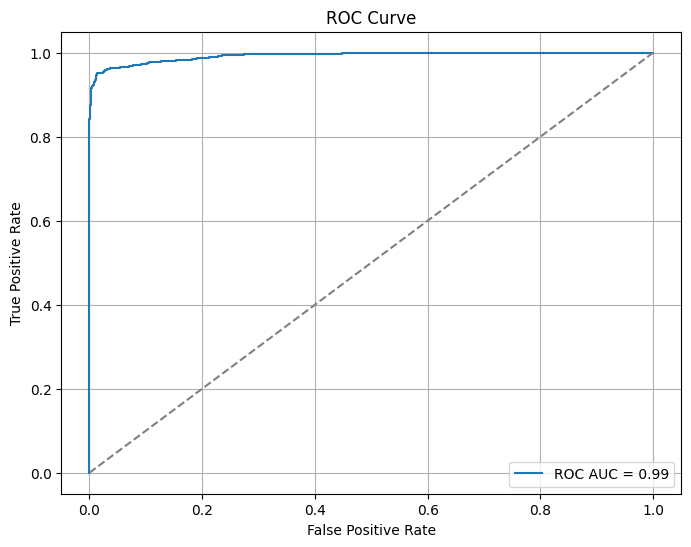

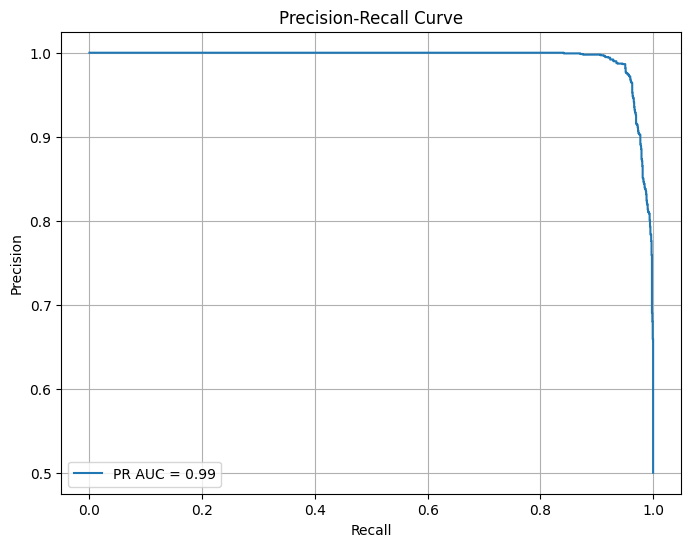

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    classification_report, roc_auc_score, precision_recall_curve, auc,
    roc_curve
)
from sklearn.calibration import CalibratedClassifierCV
import numpy as np

# Extract features and target
X = dfc.drop(columns=['Stroke'])
y = dfc['Stroke']

# Handle imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

# Base learners
base_learners = [
    ('naive_bayes', GaussianNB()),
    ('xgboost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Meta-model
meta_model = LogisticRegression(max_iter=1000)

# Stacking model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Hyperparameter grid
param_grid = {
    'xgboost__n_estimators': [100, 200],
    'xgboost__learning_rate': [0.01, 0.1],
    'final_estimator__C': [0.1, 1, 10]
}

# Grid search
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=stacking_model, param_grid=param_grid, cv=cv,
                           scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best params and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Weighted Score:", grid_search.best_score_)

# Calibrate the model
calibrated_model = CalibratedClassifierCV(grid_search.best_estimator_, method='sigmoid', cv=3)
calibrated_model.fit(X_train, y_train)

# Predict & Probabilities
y_pred = calibrated_model.predict(X_test)
y_pred_prob = calibrated_model.predict_proba(X_test)[:, 1]

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print("PR AUC:", pr_auc)

# Threshold Moving (Optional)
best_threshold = thresholds[np.argmax(2 * (precision * recall) / (precision + recall))]
print(f"Best Threshold (F1-optimal): {best_threshold:.4f}")

adjusted_preds = (y_pred_prob >= best_threshold).astype(int)
print("\nAdjusted Classification Report:")
print(classification_report(y_test, adjusted_preds))

# Feature Importances from XGBoost
xgb_model = grid_search.best_estimator_.named_estimators_['xgboost']
importances = xgb_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Features:")
print(feature_importance_df.head(10))

# Plot ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot PR Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


In [52]:
import joblib
joblib.dump(grid_search.best_estimator_, 'stroke_model.pkl')

['stroke_model.pkl']